# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

gradiente o derivada = 0
el gradiente es la derivada en cada una de las variables. derivada de una en la primera componenete del vector
y la segudna derivada de la otra el segundo componentes

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).



#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

## Problem

Giving the data provided below (x->y), find the best equation fit, using:

* Gradient Descent
* Normal Equations

Using your own python implementation, using numpy and scipy tools (**not scipy!**).

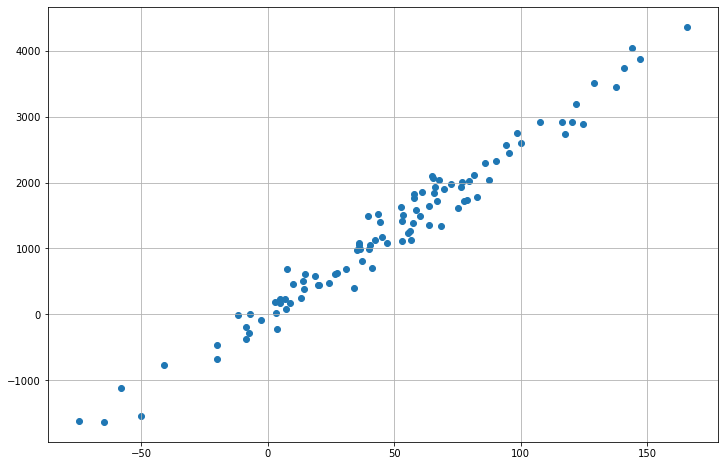

In [58]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 26
theta_1 = 26


X = (np.random.randn(100) + 1) * 50
#X=np.linspace(-50,150,100)
jitter = 200 * np.random.randn(100)
y = th0 + th1 * X + jitter


fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(X,5*X,'g-')
ax.scatter(X, y)
ax.grid(True)


In [59]:
max_iter = 100
eps = 1000
alpha = 0.0001

th0 = 26
th1 = 26
th = np.array([th0, th1])

m = len(X)

for i in range(max_iter):
    
    partial0 = 2/m * np.sum((th[0] + th[1] * X) -y)
    partial1 = 2/m * np.sum(((th[0] + th[1] * X) -y) * X)
    partgrad = np.array([partial0, partial1])

    J = np.sum(((th[0] + th[1] * X)-y)**2)/m

    th0_ = th[0] - alpha * partgrad[0]
    th1_ = th[1] - alpha * partgrad[1]
    th_ = np.array([th0_, th1_])

    J_ = np.sum(((th_[0] + th_[1] * X)-y)**2)/m

    deltaJ = np.abs(J - J_)
    
    #print(th, th_)
    #print(J, J_)
    
    if deltaJ < eps:
        print("Convergence FOUND!")
        print(th_)
        break

    J = J_
    th = th_



Convergencia encontrada
[25.99783741 25.48784529]


In [30]:
deltaJ

3.2693024747517357e+17

In [ ]:
x -> m2
y -> Price ($)

y = f(x)??? Que explique como cambia el precio con el metro cuadrado.

In [ ]:
h = theta_1 * x + theta_0

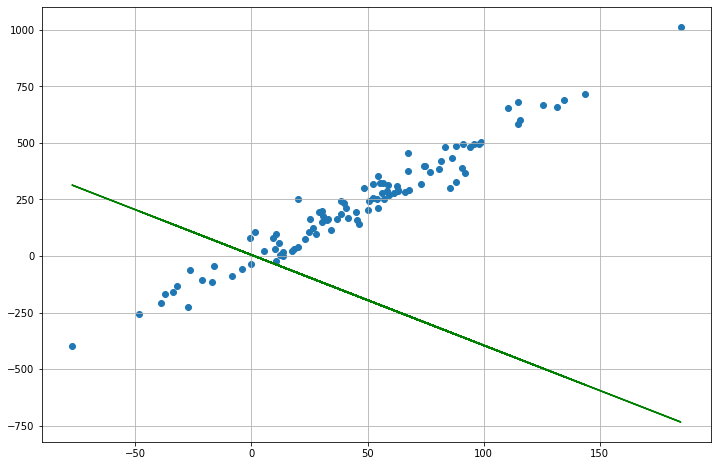

In [9]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5


X = (np.random.randn(100) + 1) * 50
#X=np.linspace(-50,150,100)
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter

theta1= -4
theta0=5
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X,theta1*X+theta0,'g-')
ax.scatter(X, y)
ax.grid(True)

$$ e_i = y_i - \hat y_i $$
$$ E = \Sigma |e_i| $$ 
$$ E = \Sigma e_i^2 $$ 

In [10]:
np.sum((theta1*X+theta0-y)**2)/len(X)

340058.7164510133

In [14]:
list_J = []
v0 = np.linspace(-10,10,20)
v1 = np.linspace(-10,10,20)
count = 0
for theta0,theta1 in zip(v0,v1):
    J = np.sum((theta1*X+theta0-y)**2)/len(X)
    list_J.append(J)
    print(count,J)
    count+=1

0 960223.890771701
1 830561.1827072686
2 710326.9854791628
3 599521.2990873838
4 498144.12353193096
5 406195.45881280495
6 323675.30493000534
7 250583.66188353242
8 186920.529673386
9 132685.90829956604
10 87879.79776207272
11 52502.19806090594
12 26553.109196065638
13 10032.531167551946
14 2940.463975364793
15 5276.907619504183
16 17041.862099970123
17 38235.327416762644
18 68857.30356988162
19 108907.79055932724


In [13]:
np.min(list_J)

2940.463975364793

In [7]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5
theta = np.array([theta_0, theta_1])

X = (np.random.randn(100) + 1) * 50
#X=np.linspace(-50,150,100)
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter

theta1 = v1[14]
theta0 = v0[14]
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X,theta1*X+theta0,'g-')
ax.scatter(X, y)
ax.grid(True)

NameError: name 'v1' is not defined

In [5]:
import numpy as np



def model_fun(theta, x):
    theta0 = theta[0]
    theta1 = theta[1]
    return theta0 + theta1 * x


def cost_fun(model_fun, theta, x, y):
    m = len(y)   
    J = np.sum((model_fun(theta,x)-y)**2)/m
    return J

def grad_fun(model_fun, theta, x, y):
    m = len(y)
    gradient1 = 2/m * (np.sum(model_fun(theta, x)-y))
    gradient2 = 2/m * (np.dot(model_fun(theta, x)-y))
    gradient = np.array([gradient1, gradient2])
    return gradient


def desc_grad(x, y, convergence = 1e-7, thetaseed = np.array([1,1])):             
    pass

In [9]:
gradient_ini = grad_fun(model_fun, theta, X, y)

TypeError: dot() missing 1 required positional argument: 'b'

In [12]:
def cost_function(X, y):

    return lambda thetas: sum((thetas[0] + thetas[1] * X - y) ** 2) / len(X)

J = cost_function(X,y)

J([0.5, 0.8])

## trozo de codigo de toni pa abreviar 

87005.31028407172